<a href="https://colab.research.google.com/github/forthenergy/midproject/blob/main/midproject(%EC%A0%95%EC%97%B4%EC%83%81).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt
# 한글화
!pip install koreanize-matplotlib
import koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 40.4 MB/s eta 0:00:00


In [5]:
# 데이터 출처 : https://github.com/owid/co2-data?tab=readme-ov-file

df = pd.read_csv('/content/owid-co2-data.csv')
df

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.000,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50186,Zimbabwe,2019,ZWE,15271377.0,2.514642e+10,0.473,0.031,10.263,-0.942,-8.411,...,NaN,0.106,0.001,0.001,0.002,0.0,34.348,17.531,-0.027,-0.261
50187,Zimbabwe,2020,ZWE,15526888.0,2.317871e+10,0.496,0.032,8.495,-1.768,-17.231,...,NaN,0.105,0.001,0.001,0.002,0.0,31.323,15.775,0.612,7.209
50188,Zimbabwe,2021,ZWE,15797220.0,2.514009e+10,0.531,0.034,10.204,1.709,20.120,...,NaN,0.104,0.001,0.001,0.002,0.0,33.549,17.599,0.539,5.280
50189,Zimbabwe,2022,ZWE,16069061.0,2.590159e+10,0.531,0.033,10.425,0.221,2.169,...,NaN,0.103,0.001,0.001,0.002,0.0,33.772,17.910,0.315,3.018


In [6]:
# 데이터프레임 기본 구조 확인
df_info = df.info()

# 결측치 확인
missing_values = df.isnull().sum()

df_info, missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50191 entries, 0 to 50190
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    50191 non-null  object 
 1   year                                       50191 non-null  int64  
 2   iso_code                                   42262 non-null  object 
 3   population                                 41019 non-null  float64
 4   gdp                                        15251 non-null  float64
 5   cement_co2                                 28863 non-null  float64
 6   cement_co2_per_capita                      25358 non-null  float64
 7   co2                                        29137 non-null  float64
 8   co2_growth_abs                             26981 non-null  float64
 9   co2_growth_prct                            26002 non-null  float64
 10  co2_including_luc     

(None,
 country                            0
 year                               0
 iso_code                        7929
 population                      9172
 gdp                            34940
                                ...  
 temperature_change_from_n2o    12131
 total_ghg                      12781
 total_ghg_excluding_lucf       12955
 trade_co2                      45656
 trade_co2_share                45656
 Length: 79, dtype: int64)

In [7]:
# 결측치 확인
print(df.isnull().sum())

country                            0
year                               0
iso_code                        7929
population                      9172
gdp                            34940
                               ...  
temperature_change_from_n2o    12131
total_ghg                      12781
total_ghg_excluding_lucf       12955
trade_co2                      45656
trade_co2_share                45656
Length: 79, dtype: int64


In [8]:
# 결측치 처리
# 시계열 데이터를 고려한 backward fill 적용 ('gdp', 'population' 컬럼)
df[['gdp', 'population']] = df[['gdp', 'population']].bfill()

# backward fill 적용 후 결측치 재확인
filled_missing_values = df[['gdp', 'population']].isnull().sum()

filled_missing_values

,0
gdp,1
population,0


남아 있는 결측치는 Zimbabwe의 2023년도 데이터

In [9]:
# 'iso_code' 컬럼의 결측치 중 country에 (GCP)가 포함되어 있는 결측치를 GCP로 처리
df.loc[df['iso_code'].isnull() & df['country'].str.contains('GCP'), 'iso_code'] = 'GCP'

# 처리 후 결과 확인
iso_code_missing_after = df['iso_code'].isnull().sum()
iso_code_value_counts = df['iso_code'].value_counts()

iso_code_missing_after, iso_code_value_counts.head(10)

(np.int64(6107),
 iso_code
 GCP    1822
 AFG     274
 AND     274
 ATA     274
 BGD     274
 BOL     274
 BTN     274
 BHR     274
 AUS     274
 BRB     274
 Name: count, dtype: int64)

In [10]:
# 필요한 컬럼만 선택
co2_columns = ["country", "year", "co2", "co2_growth_prct"]
df_co2 = df[co2_columns].fillna(0) # 결측치를 0으로 대체

# 전 세계 데이터만 필터링
df_global = df_co2[df_co2["country"] == "World"]

# 데이터 확인
print(df_global.tail())  # 최근 데이터 확인

      country  year        co2  co2_growth_prct
49564   World  2019  37104.273            1.018
49565   World  2020  35126.527           -5.330
49566   World  2021  36991.734            5.310
49567   World  2022  37293.836            0.817
49568   World  2023  37791.570            1.335


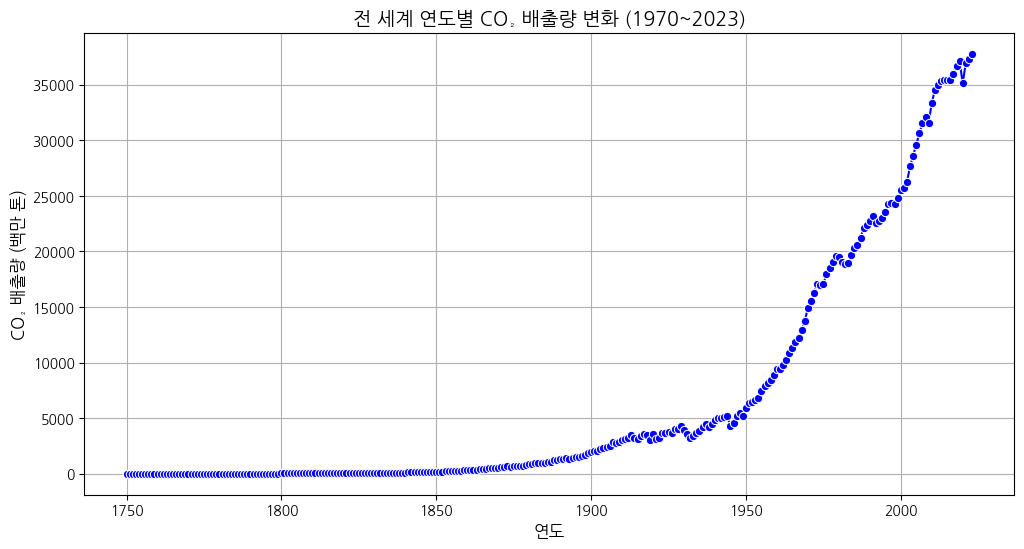

In [11]:
# 그래프 설정
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_global, x="year", y="co2", marker="o", color="b")

# 그래프 스타일 설정
plt.title("전 세계 연도별 CO₂ 배출량 변화 (1970~2023)", fontsize=14)
plt.xlabel("연도", fontsize=12)
plt.ylabel("CO₂ 배출량 (백만 톤)", fontsize=12)
plt.grid(True)
plt.show()


In [12]:
# 최근 10년 데이터 필터링 (2013~2023)
df_recent = df_global[df_global["year"] >= 2013]

# 최근 10년 연평균 Co2 감소율 계산
avg_reduction_rate = df_recent["co2_growth_prct"].mean()

# 결과 출력
print(f"최근 10년간 연평균 CO₂ 변화율: {avg_reduction_rate:.2f}%")


최근 10년간 연평균 CO₂ 변화율: 0.73%


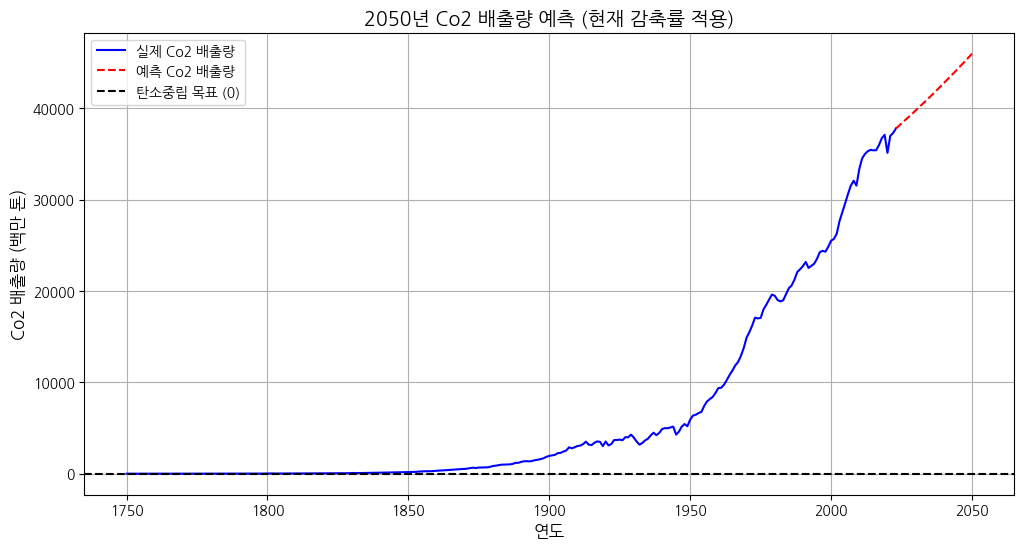

In [13]:
# 2050년까지 연도 생성
future_years = np.arange(2023, 2051)

# 현재 감축률 적용하여 미래 예상 Co2 배출량 계산
future_co2 = [df_global["co2"].iloc[-1]]  # 최신 Co2 값 가져오기
for _ in future_years[1:]:
    future_co2.append(future_co2[-1] * (1 + avg_reduction_rate / 100))  # 연평균 감소율 적용

# 데이터프레임 생성
df_future = pd.DataFrame({"year": future_years, "predicted_co2": future_co2})

# 예측 결과 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_global, x="year", y="co2", label="실제 Co2 배출량", color="b")
sns.lineplot(data=df_future, x="year", y="predicted_co2", label="예측 Co2 배출량", color="r", linestyle="dashed")

# 그래프 스타일 설정
plt.axhline(y=0, color="black", linestyle="--", label="탄소중립 목표 (0)")
plt.title("2050년 Co2 배출량 예측 (현재 감축률 적용)", fontsize=14)
plt.xlabel("연도", fontsize=12)
plt.ylabel("Co2 배출량 (백만 톤)", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


In [14]:
# 필요한 연평균 감축률 계산 (현재 Co2 배출량 → 2050년 0 목표)
current_co2 = df_global["co2"].iloc[-1]  # 최신 Co2 값
years_left = 2050 - 2023  # 남은 기간

# 감축 공식: (1 - 감축률)^years_left = 목표값 / 현재값
required_reduction_rate = 1 - (0 / current_co2) ** (1 / years_left)

# 결과 출력
print(f"2050년 탄소중립을 달성하려면 연평균 {required_reduction_rate*100:.2f}%의 감축률이 필요함.")


2050년 탄소중립을 달성하려면 연평균 100.00%의 감축률이 필요함.


In [15]:
import ipywidgets as widgets
from IPython.display import display

# 산업별 탄소 배출량 컬럼 선택
industry_columns = ["coal_co2", "oil_co2", "gas_co2", "cement_co2", "flaring_co2", "other_industry_co2"]

# 전 세계 데이터 필터링
world_df = df[df["country"] == "World"]

# 유효한 연도 범위 찾기
min_year = world_df["year"].min()
max_year = world_df["year"].max()

# 함수 정의: 특정 연도의 산업별 CO2 배출량을 파이 차트로 시각화
def plot_co2_pie_chart(year):
    # 해당 연도 데이터 가져오기
    data = world_df[world_df["year"] == year][industry_columns].sum()

    # 데이터가 없을 경우 예외 처리
    if data.isnull().all():
        print(f"No data available for the year {year}")
        return

    # 라벨 가공
    labels = [label.replace("_co2", "").capitalize() for label in data.index]

    # 파이 차트 시각화
    plt.figure(figsize=(8, 8))
    plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=140, counterclock=False)
    plt.title(f"CO2 Emissions by Industry in {year}")
    plt.show()

# 슬라이더 위젯 생성
year_slider = widgets.IntSlider(
    value=max_year,
    min=min_year,
    max=max_year,
    step=1,
    description='Year:',
    continuous_update=False
)

# 인터랙티브 위젯 실행
widgets.interactive(plot_co2_pie_chart, year=year_slider)

interactive(children=(IntSlider(value=2023, continuous_update=False, description='Year:', max=2023, min=1750),…

In [16]:
# ISO 코드가 없는 국가 제외
filtered_df = df.dropna(subset=["iso_code"])

# 산업별 탄소 배출량 컬럼 선택
industry_columns = ["coal_co2", "oil_co2", "gas_co2", "cement_co2", "flaring_co2", "other_industry_co2"]

# 유효한 연도 범위 찾기
min_year = int(filtered_df["year"].min())
max_year = int(filtered_df["year"].max())

# 산업별 국가별 CO2 배출 비율을 시각화하는 함수
def plot_co2_pie_by_country(year, industry):
    # 연도별 데이터 필터링 (전 세계 제외)
    year_data = filtered_df[(filtered_df["year"] == year) & (filtered_df["country"] != "World")]

    # 해당 산업 데이터 가져오기
    industry_data = year_data[["country", industry]].dropna().sort_values(by=industry, ascending=False)

    # 상위 10개 국가 + 기타 국가 집계
    top_10 = industry_data[:10]
    others = industry_data[10:][industry].sum()

    # 데이터 합치기
    pie_data = top_10.set_index("country")[industry]
    if others > 0:
        pie_data["Others"] = others

    # 파이 차트 시각화
    plt.figure(figsize=(8, 8))
    plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=140, counterclock=False)
    plt.title(f"CO2 Emissions by Country for {industry.replace('_co2', '').capitalize()} in {year}")
    plt.show()

# 슬라이더 및 드롭다운 메뉴 생성
year_slider = widgets.IntSlider(
    value=max_year,
    min=min_year,
    max=max_year,
    step=1,
    description='Year:',
    continuous_update=False
)

industry_dropdown = widgets.Dropdown(
    options=industry_columns,
    value="coal_co2",
    description="Industry:"
)

# 인터랙티브 위젯 실행
interactive_plot = widgets.interactive(plot_co2_pie_by_country, year=year_slider, industry=industry_dropdown)
display(interactive_plot)

interactive(children=(IntSlider(value=2023, continuous_update=False, description='Year:', max=2023, min=1750),…

## Coal_co2


1.   중국
2.   인도
3.   미국
4.   러시아
5.   인도네시아
6.   일본
7.   남아프리카
8.   한국


## Oil_co2

 1. 미국
 2. 중국
 3. 인도
 4. 사우디 아라비아
 5. 러시아
 6. 일본
 7. 브라지
 8. 캐나다

##Gas_co2

 1. 미국
 2. 러시아
 3. 중국
 4. 이란
 5. 사우디 아라비아
 6. 캐나다
 7. 일본
 8. 멕시코

## Cement_co2

1. 중국
2. 이란
3. 베트남
4. 미국
5. 이란
6. 터키
7. 사우디 아라비아
8. 인도네시아

## flaring_co2

1. 미국
2. 러시아
3. 이란
4. 이라크
5. 브라질
6. 캐나다
7. 오스트리아
8. 베네수엘라

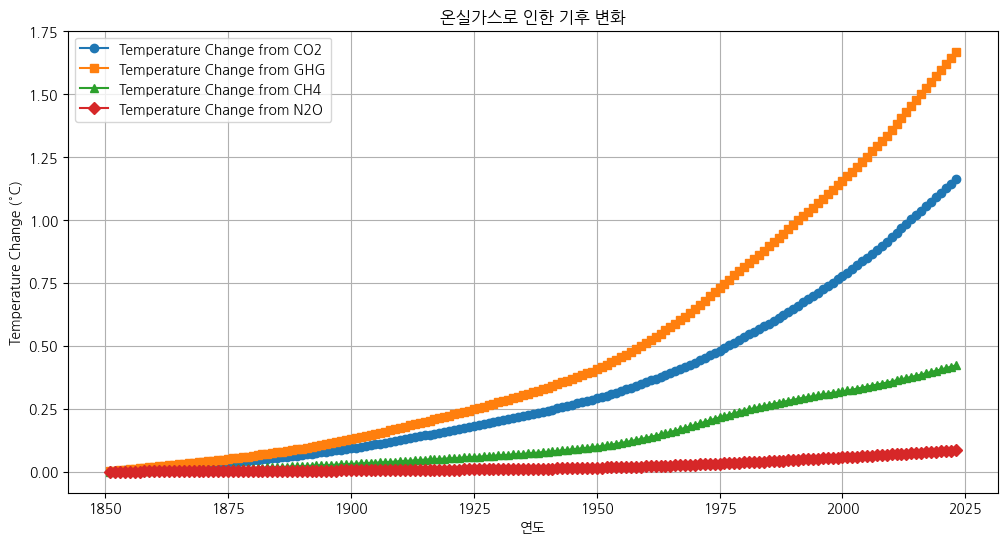

In [17]:
# 온실가스 배출 및 기후 변화 영향 컬럼 선택
ghg_climate_columns = [
    "temperature_change_from_co2", "temperature_change_from_ghg", "temperature_change_from_ch4", "temperature_change_from_n2o"
]

# 전 세계 데이터 선택 (World)
world_ghg_data = df[df["country"] == "World"]

# 기온 변화를 나타내는 시계열 그래프
plt.figure(figsize=(12, 6))
plt.plot(world_ghg_data["year"], world_ghg_data["temperature_change_from_co2"], label="Temperature Change from CO2", linestyle='-', marker='o')
plt.plot(world_ghg_data["year"], world_ghg_data["temperature_change_from_ghg"], label="Temperature Change from GHG", linestyle='-', marker='s')
plt.plot(world_ghg_data["year"], world_ghg_data["temperature_change_from_ch4"], label="Temperature Change from CH4", linestyle='-', marker='^')
plt.plot(world_ghg_data["year"], world_ghg_data["temperature_change_from_n2o"], label="Temperature Change from N2O", linestyle='-', marker='D')

plt.xlabel("연도")
plt.ylabel("Temperature Change (°C)")
plt.title("온실가스로 인한 기후 변화")
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# 국가 리스트 정의
developing = ["India", "Mexico", "South Africa", "Brazil", "Indonesia", "Iran", "China", "Saudi Arabia"]
developed = ["United States", "Russia", "Germany", "Japan", "United Kingdom",
             "Canada", "Ukraine", "France", "Italy", "Poland", "South Korea", "Australia"]

# 1985년 이후 데이터 필터링
df_filtered = df[df['year'] > 1985]

# 선진국 데이터 pivot
df_developed = df_filtered[df_filtered['country'].isin(developed)].pivot(index='country', columns='year', values='co2_per_unit_energy')

# 개발도상국 데이터 pivot
df_developing = df_filtered[df_filtered['country'].isin(developing)].pivot(index='country', columns='year', values='co2_per_unit_energy')

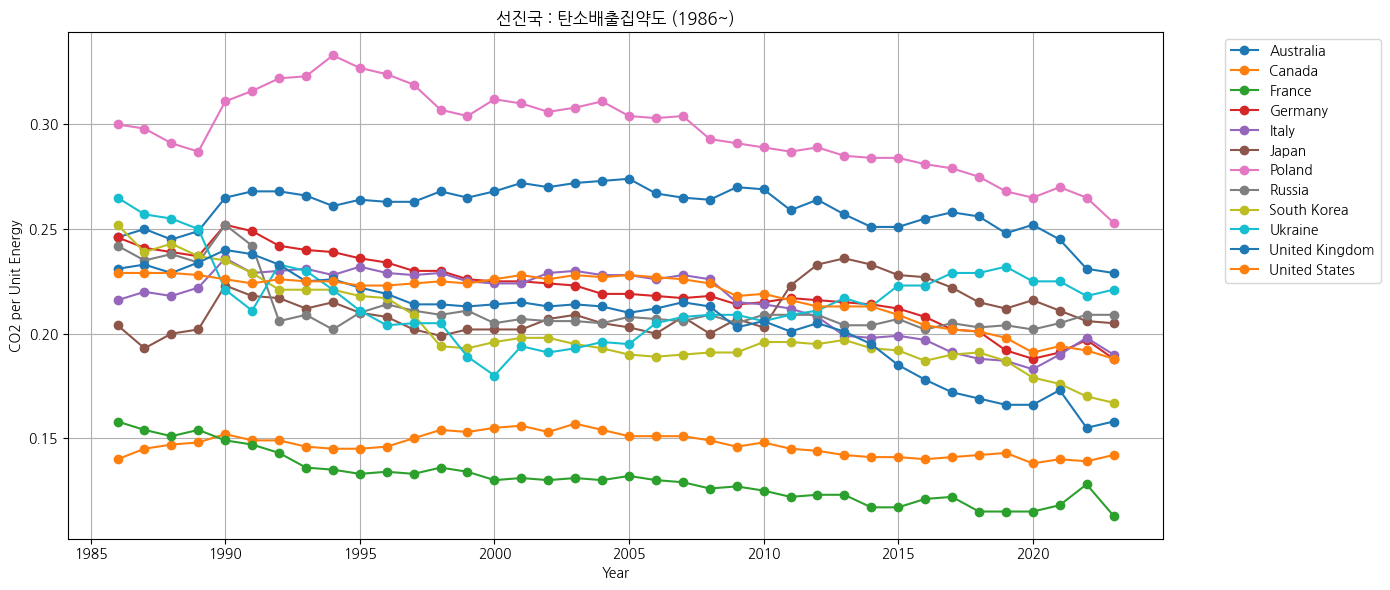

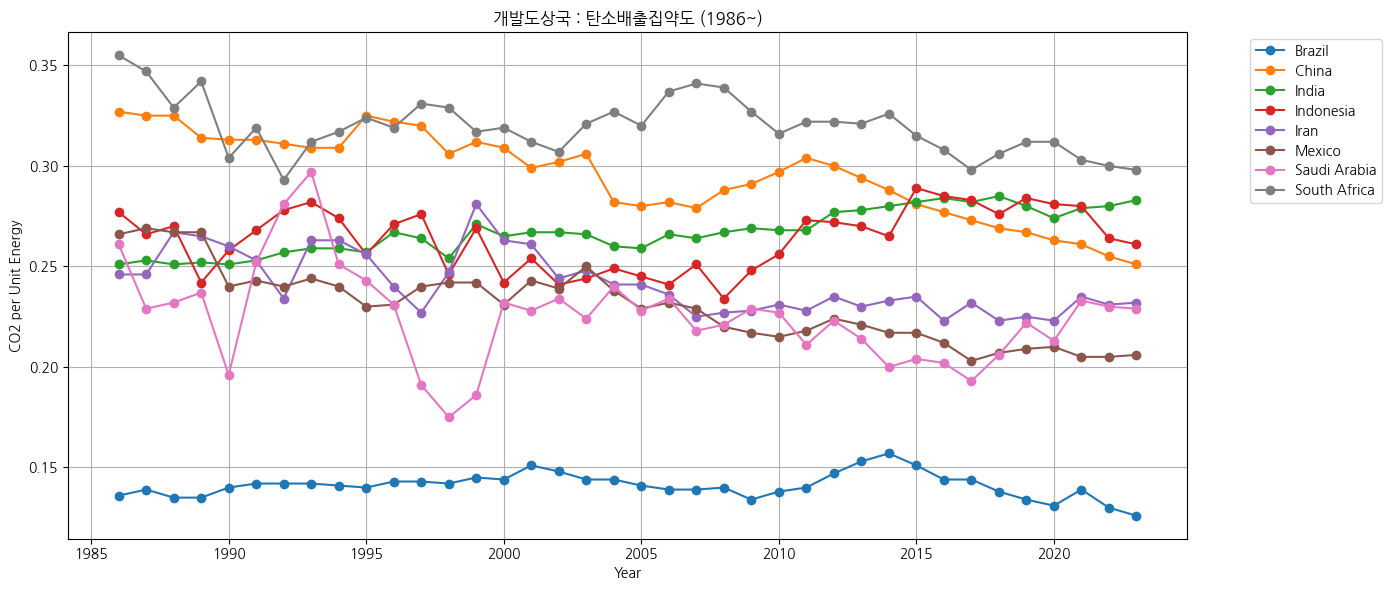

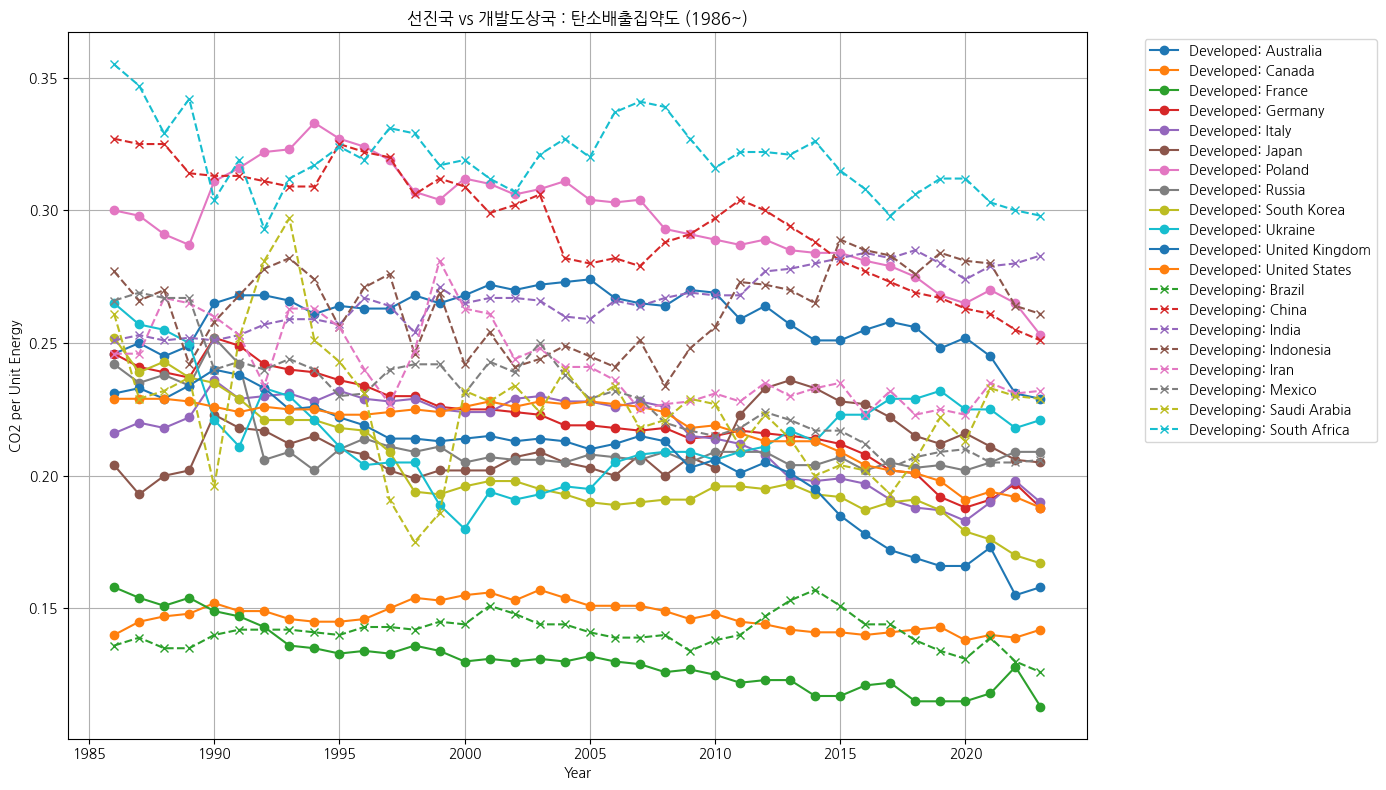

In [19]:
# 선진국 그래프
plt.figure(figsize=(14, 6))
for country in df_developed.index:
    plt.plot(df_developed.columns, df_developed.loc[country], marker='o', label=country)

plt.xlabel('Year')
plt.ylabel('CO2 per Unit Energy')
plt.title('선진국 : 탄소배출집약도 (1986~)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# 개발도상국 그래프
plt.figure(figsize=(14, 6))
for country in df_developing.index:
    plt.plot(df_developing.columns, df_developing.loc[country], marker='o', label=country)

plt.xlabel('Year')
plt.ylabel('CO2 per Unit Energy')
plt.title('개발도상국 : 탄소배출집약도 (1986~)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# 선진국과 개발도상국 합쳐진 그래프
plt.figure(figsize=(14, 8))
for country in df_developed.index:
    plt.plot(df_developed.columns, df_developed.loc[country], marker='o', label=f"Developed: {country}")

for country in df_developing.index:
    plt.plot(df_developing.columns, df_developing.loc[country], linestyle='--', marker='x', label=f"Developing: {country}")

plt.xlabel('Year')
plt.ylabel('CO2 per Unit Energy')
plt.title('선진국 vs 개발도상국 : 탄소배출집약도 (1986~)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

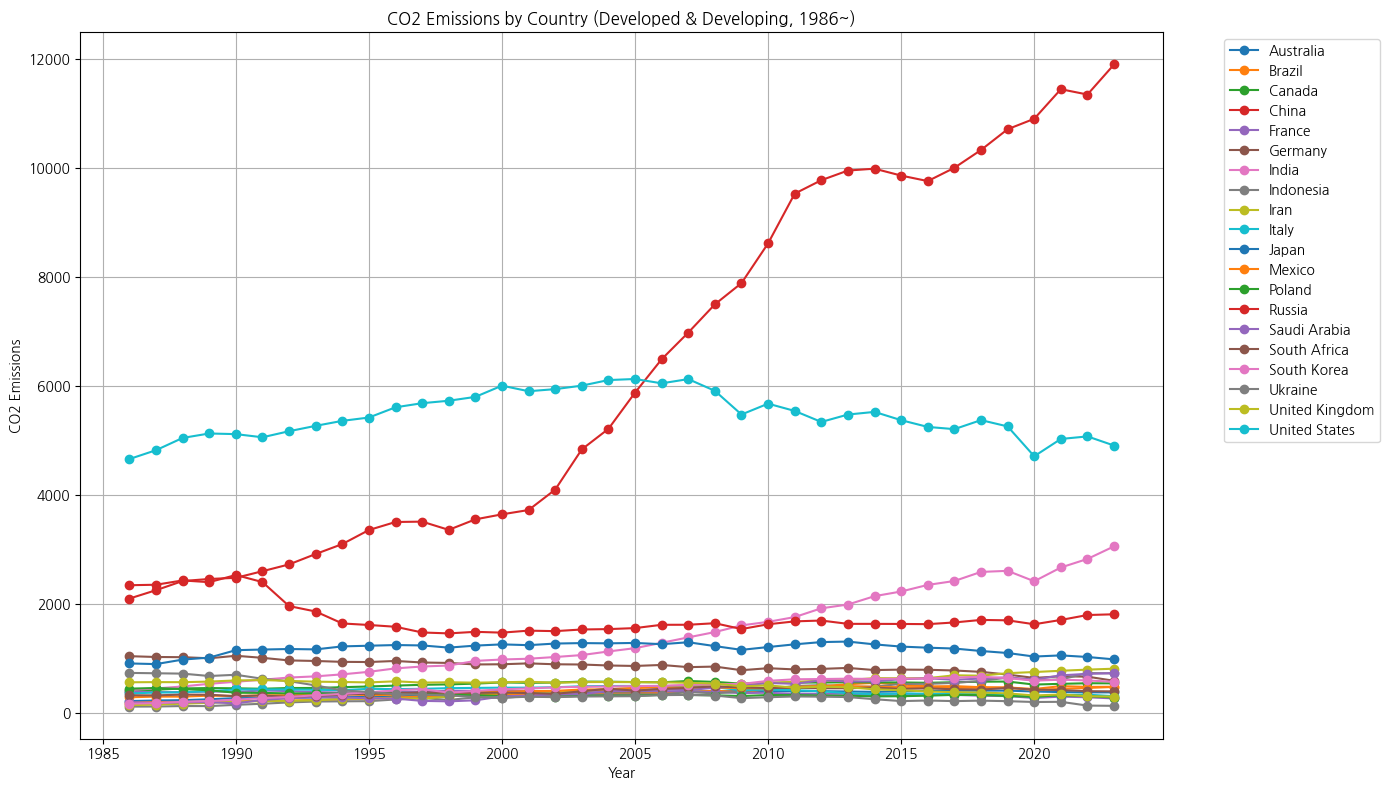

In [20]:
# 선진국과 개발도상국 국가 합치기
combined_countries = developed + developing

# 필요한 데이터 필터링 (1986년 이후, 지정 국가)
df_combined_co2 = df[(df['year'] > 1985) & (df['country'].isin(combined_countries))]

# pivot을 사용하여 country를 행, year를 열로 구성, co2 값을 지정
df_pivot_co2 = df_combined_co2.pivot(index='country', columns='year', values='co2')

# 그래프 시각화
plt.figure(figsize=(14, 8))
for country in df_pivot_co2.index:
    plt.plot(df_pivot_co2.columns, df_pivot_co2.loc[country], marker='o', label=country)

plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.title('CO2 Emissions by Country (Developed & Developing, 1986~)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()